# K Nearest Neighbour Algorithm 
## For Handwritten Digit Recognition

Code for the training and testing of this algorithm is based on these articles:
-  https://medium.com/@nikhilanandikam/handwritten-digit-recognition-hdr-using-k-nearest-neighbors-knn-f4c794a0282a
- Allibhai, J. (2018, October 2). Building a K-nearest-neighbors (K-nn) model with Scikit-Learn. Medium. https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a 

In [1]:
# Imports & Librarys
from sklearn.datasets import fetch_openml, load_digits
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns


The methods used in the implementation of this code are as follows:  
```accuracy```  
Determines the accuracy score of the model  

```Get_Neightbors```
Finds the closest items to the item we are predicting  

```predict_Classification```  
Makes the preictions using the get neighbors methods




In [2]:
# Methods
def accuracy(y_true, y_pred):
 n_correct = 0
 for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
        n_correct += 1
 acc = n_correct/len(y_true)
 return acc

def Get_Neighbors(train, test_row, num):
 
 distance = list() # []
 data = []
 for i in train:
    dist = Euclidean_distance(test_row, i)
    distance.append(dist)
    data.append(i)
 distance = np.array(distance)
 data = np.array(data)
 #Finding the index in ascending order
 index_dist = distance.argsort()
 #Arranging data according to index
 data = data[index_dist]
 #slicing k value from number of data
 neighbors = data[:num]
 
 return neighbors

def Euclidean_distance(row1, row2):
 distance = 0
 for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2
 return np.sqrt(distance)

def predict_classification(train, test_row, num):
 Neighbors = Get_Neighbors(train, test_row, num)
 Classes = []
 for i in Neighbors:
   Classes.append(i[-1])
 prediction = max(Classes, key= Classes.count)
 return prediction

In [3]:
df = pd.read_csv("C:/Users/ccjd5/OneDrive - University of Waterloo/4B/MSCI 546/MSCI546/train.csv")
features = df.loc[:, df.columns != 'label']
true_labels = df['label']
x = np.array(features)
y = np.array(true_labels)
x.shape, y.shape
#output ((70000, 784), (70000,))
# shuffling the values of x and y
si = np.random.permutation(x.shape[0])
x = x[si]
y = y[si]

In [6]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x, y)


#slicing data
#trainx = x[:2000]
#trainy = y[:2000]
#Inserting trainy in trainx
#train = np.insert(trainx, 784, trainy, axis = 1)

[0.9652381  0.97083333 0.96345238 0.96761905 0.96916667]
cv_scores mean:0.9672619047619048


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [9]:
# Metrics
print(knn_gscv.best_params_)
y_pred = knn_gscv.predict(X_test)
print("Accuracy:", accuracy(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Precisison:", precision_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test,y_pred, average='weighted'))


{'n_neighbors': 3}
Accuracy: 0.9838095238095238
Recall: 0.9838095238095238
Precisison: 0.9838963555544418
F1 Score: 0.9837975233881154


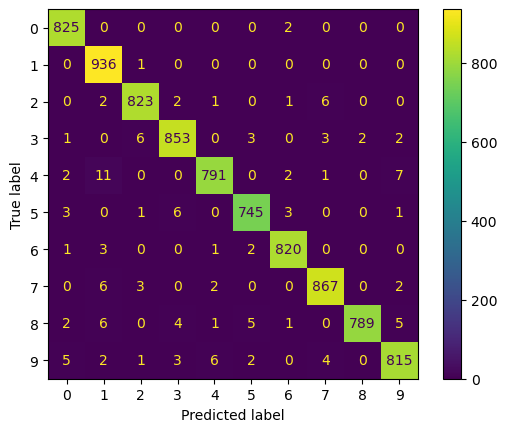

In [10]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
